In [1]:
%load_ext autoreload
%autoreload 2

from notebooks import UVyper as UV

### 1. Preprocessing

1 . ``org_dataset`` is the path of the dataset
2 . ``preprocessed_dataset`` is name of the preprocessed dataset you need to save as
3 . ``dependent_variable`` is the dependent variable of the dataset
4 . ``ordinal_variables`` is the list of ordinal variables in the dataset
5 . ``parallel_plot_filename`` is the name of the parallel plot image you need to save as

In [2]:
org_dataset = 'sample_data.csv'
preprocessed_dataset = 'sample_data_preprocessed.csv'
dependent_variable = 'individual_id'
ordinal_variables = ['relationship', 'complex_chronic_common_flag']
parallel_plot_filename = 'parallel_plot.png'

#### 1.1. Call the Preprocessing Class

In [3]:
pps = UV.Preprocessing(org_dataset)

#### 1.2. Missing values and zero values table

In [4]:
missing_table = pps.missing_zero_values_table()

#### 1.3. Variable types

In [5]:
for key, value in pps.show_variable_types(pps.vyper(dependent_variable=dependent_variable)).items():
    print(key, ":", value)

individual_id : target_variable
lob : categorical
age_nbr : continuous
gender_cd : binary
marital : binary
income : continuous
aetna_family_size : continuous
aetna_num_children : continuous
aetna_num_children_modif : continuous
relationship : categorical
active_medical_ind : binary
active_dental_ind : binary
active_pharmacy_ind : binary
active_vision_ind : binary
active_medicare_ind : binary
med_mths : exclude
rx_mths : continuous
a2020_medical_ind : exclude
a2020_dental_ind : binary
a2020_vision_ind : binary
a2020_rx_ind : binary
a2020_medicare_ind : binary
final_total_tenure : continuous
final_future_tenure : continuous
dsnp_ind : exclude
mmp_ind : exclude
urbsubr : categorical
state_cd : categorical
tot_allow_amt : continuous
tot_paid_amt : continuous
srv_copay_amt : continuous
rx_allowed_amt : exclude
rx_paid_amt : exclude
rx_copay : exclude
pcp_visit_cnt : continuous
pcp_allowed_amt : continuous
spclty_visit_cnt : continuous
immunization_visit_cnt : continuous
hosop_rad_visit_cnt 

#### 1.4. Recoding

        """
        Method to recode the data
        :param bounds: float - this parameter is used to calculate the quantile function for numeric variables. It determines the range of the bin where the data will be recoded.
        :param min_bin_size: float - this parameter is used to determine whether or not a binary variable should be split into two separate variables. If the proportion of the most frequent value in the binary variable is less than min_bin_size, the variable is left as is. Otherwise, two variables are created: one indicating the presence of the most frequent value, and another indicating the missing values.
        :param dependent_variable: string - this parameter specifies the dependent variable of the dataset. This variable is used to train a vyper model to determine which variables should be recoded.
        :param ordinal_variables: list - this parameter is used to specify which variables should be treated as ordinal variables. If a variable is specified as ordinal, it will be recoded using factorization. If it is not specified as ordinal, it will be treated as a numeric variable and recoded using the quantile function.
        :return: dataframe, list, list, set, list
        """

In [6]:
df, numeric_variables, binary_variables, category_variables, ordinal_variables = pps.recoding(bounds=0.98,
                                                                                              min_bin_size=0.1,
                                                                                              dependent_variable=dependent_variable,
                                                                                              ordinal_variables=ordinal_variables)

Excluded variables (vyper):  {'total_mail_rx_scripts', 'individual_id', 'hc_healthmonitor_allowed_amt', 'ip_allowed_pmpm', 'avoider_case_cnt', 'impactip_allowed_amt', 'mc_non_covid_allowed_amt', 'cp_premium_fi', 'readmit_case_cnt', 'ip_allowed_amt', 'readmit_allowed_amt', 'mc_non_covid_cnt', 'hosop_rad_allowed_pmpm', 'eyeexam_allowed_amt', 'hosop_lab_allowed_amt', 'teledoc_visit', 'homecare_visit_cnt', 'ip_case_cnt', 'mc_paid_amt', 'cvs_rx_spec_scripts', 'rx_allowed_pmpm', 'cm_targeted', 'eyeexam_visit_cnt', 'star_gap_ind', 'mc_covid_paid_amt', 'total_dentalclean_allowed_amt', 'cvs_rx_scripts', 'dsnp_ind', 'hc_medicaltest_allowed_amt', 'cp_mbr_total_med_cost', 'me_mbr_total_med_cost', 'homecare_allowed_amt', 'op_prenatal_allowed_amt', 'er_mcable_visit_count', 'cvs_rx_retail_scripts', 'hc_physicaltherapy_allowed_amt', 'mc_visit_cnt', 'cp_fund_type', 'impactip_case_cnt', 'mc_covid_allowed_amt', 'er_case_cnt', 'cm_engaged', 'cvs_cohort', 'rx_copay', 'op_fertility_visit_cnt', 'mbr_premium_

#### 1.5. Imputation

Imputation is done using the mean for numeric variables and the mode for binary and categorical variables.


In [7]:
pps.impute_na(numeric_variables, 'mean')
pps.impute_na(binary_variables, 'mode')
pps.impute_na(category_variables, 'mode')

#### 1.6. Correlation

In [8]:
pps.correlation(numeric_variables, ordinal_variables, 0.8)

List of columns removed due to high correlation:  ['ucc_visit_cnt_processed', 'pcp_allowed_amt_processed', 'tot_allow_amt_processed', 'medical_allowed_pmpm_processed', 'pulse_processed', 'op_rehab_visit_cnt_processed', 'srv_copay_amt_processed', 'max_pulse_processed', 'aetna_num_children_modif_processed', 'tot_paid_amt_processed', 'aetna_num_children_processed']


lob urbsubr state_cd  ucc_allowed_amt_processed  \
0     CSI       S       LA                  45.390472   
1     CFI       U       TX                  68.690000   
2     CSI       U       OH                   0.000000   
3     CFI       R       MN                   0.000000   
4     CSI       U       OH                  45.390472   
...   ...     ...      ...                        ...   
9995  CSI       R       FL                   0.000000   
9996  CSI       U       FL                 135.000000   
9997  CSI       U       TX                 213.140000   
9998  CSI       U       WA                   0.000000   
9999  CFI       U       FL                   0.000000   

      aetna_family_size_processed  final_future_tenure_processed  \
0                               2                       1.000000   
1                               2                      18.536414   
2                               2                      18.536414   
3                               3                      18.536414   
4                               4                      18.536414   
...                           ...                            ...   
9995                            1                      14.670000   
9996                            3                      11.090000   
9997                            4                      38.020000   
9998                            2                       1.000000   
9999                            2                      17.710000   

      medical_paid_pmpm_processed  pcp_visit_cnt_processed  \
0                      370.148422                 2.328148   
1                       11.955000                 0.000000   
2                       95.195000                 0.000000   
3                      658.296667                 0.000000   
4                      370.148422                 2.328148   
...                           ...                      ...   
9995                   612.539167                 6.000000   
9996                    15.384167                 3.000000   
9997                   218.684167                11.000000   
9998                    64.033333                 2.000000   
9999                   321.350000                 3.000000   

      medical_copay_pmpm_processed  rx_mths_processed  ...  lbp_missing_ind  \
0                        12.051140                  0  ...                1   
1                         0.000000                 12  ...                1   
2                         0.000000                  0  ...                1   
3                         3.333333                 12  ...                1   
4                        12.051140                  0  ...                1   
...                            ...                ...  ...              ...   
9995                     14.583333                 12  ...                0   
9996                     11.250000                  0  ...                0   
9997                      0.000000                 12  ...                0   
9998                      1.250000                  0  ...                0   
9999                     73.750000                 12  ...                0   

      hyc_missing_ind  hyc_ind  hyp_missing_ind  hyp_ind  obe_missing_ind  \
0                   1        0                1        0                1   
1                   1        0                1        0                1   
2                   1        0                1        0                1   
3                   1        0                1        0                1   
4                   1        0                1        0                1   
...               ...      ...              ...      ...              ...   
9995                0        0                0        1                0   
9996                0        1                0        0                0   
9997                0        1                0        0                0   
9998                0        1          

#### 1.7. Cramers V method to calculate correlation between categorical variables and remove highly correlated variables

In [9]:
cramers_matrix = pps.cramers_v_matrix(category_variables, 0.1)

List of columns removed due to higher than the threshold cramers v value:  ['state_cd']


#### 1.8. Category encoding

In [10]:
pps.category_encoding(category_variables)

#### 1.9. Outlier percentage table

In [11]:
outlier_per_table = pps.outlier_percentages(pps.get_df().columns, 6)

#### 1.10. Outlier capping

In [12]:
pps.outlier_capping(pps.get_df().columns, 6)

ucc_allowed_amt_processed  aetna_family_size_processed  \
0                     45.390472                            2   
1                     68.690000                            2   
2                      0.000000                            2   
3                      0.000000                            3   
4                     45.390472                            4   
...                         ...                          ...   
9995                   0.000000                            1   
9996                 135.000000                            3   
9997                 213.140000                            4   
9998                   0.000000                            2   
9999                   0.000000                            2   

      final_future_tenure_processed  medical_paid_pmpm_processed  \
0                          1.000000                   370.148422   
1                         18.536414                    11.955000   
2                         18.536414                    95.195000   
3                         18.536414                   658.296667   
4                         18.536414                   370.148422   
...                             ...                          ...   
9995                      14.670000                   612.539167   
9996                      11.090000                    15.384167   
9997                      38.020000                   218.684167   
9998                       1.000000                    64.033333   
9999                      17.710000                   321.350000   

      pcp_visit_cnt_processed  medical_copay_pmpm_processed  \
0                    2.328148                     12.051140   
1                    0.000000                      0.000000   
2                    0.000000                      0.000000   
3                    0.000000                      3.333333   
4                    2.328148                     12.051140   
...                       ...                           ...   
9995                 6.000000                     14.583333   
9996                 3.000000                     11.250000   
9997                11.000000                      0.000000   
9998                 2.000000                      1.250000   
9999                 3.000000                     73.750000   

      rx_mths_processed  final_total_tenure_processed  \
0                     0                    100.000000   
1                    12                     65.698627   
2                     0                     65.698627   
3                    12                     65.698627   
4                     0                     65.698627   
...                 ...                           ...   
9995                 12                     68.670000   
9996                  0                     84.090000   
9997                 12                     53.020000   
9998                  0                    100.000000   
9999                 12                     33.710000   

      strat_score_value_processed  first_pulse_processed  ...  \
0                       49.039475               8.109547  ...   
1                       49.039475               8.109547  ...   
2                       49.039475               8.109547  ...   
3                       49.039475               8.109547  ...   
4                       49.039475               8.109547  ...   
...                           ...                    ...  ...   
9995                    93.000000               8.378500  ...   
9996                    67.000000               8.715800  ...   
9997                    94.000000               8.567200  ...   
9998                    54.000000               7.674800  ...   
9999                    85.000000               8.256800  ...   

      active_pharmacy_ind_ind  cvs_rx_inrange_ind_ind  anx_missing_ind  \
0                           0                       1                1   
1                           1                    

#### 1.11. Standardization

In [13]:
pps.standardization()

ucc_allowed_amt_processed  aetna_family_size_processed  \
0                  7.410155e-17                    -0.417954   
1                  2.429877e-01                    -0.417954   
2                 -4.733712e-01                    -0.417954   
3                 -4.733712e-01                     0.184285   
4                  7.410155e-17                     0.786524   
...                         ...                          ...   
9995              -4.733712e-01                    -1.020192   
9996               9.345258e-01                     0.184285   
9997               1.749437e+00                     0.786524   
9998              -4.733712e-01                    -0.417954   
9999              -4.733712e-01                    -0.417954   

      final_future_tenure_processed  medical_paid_pmpm_processed  \
0                         -1.925242                     0.015848   
1                          0.000000                    -0.474850   
2                          0.000000                    -0.360818   
3                          0.000000                     0.410589   
4                          0.000000                     0.015848   
...                             ...                          ...   
9995                      -0.424476                     0.347905   
9996                      -0.817508                    -0.470152   
9997                       2.139013                    -0.191647   
9998                      -1.925242                    -0.403507   
9999                      -0.090728                    -0.051002   

      pcp_visit_cnt_processed  medical_copay_pmpm_processed  \
0                    0.000000                      0.004508   
1                   -1.093376                     -0.580800   
2                   -1.093376                     -0.580800   
3                   -1.093376                     -0.418904   
4                    0.000000                      0.004508   
...                       ...                           ...   
9995                 1.724425                      0.127493   
9996                 0.315524                     -0.034402   
9997                 4.072593                     -0.580800   
9998                -0.154109                     -0.520089   
9999                 0.315524                      3.001139   

      rx_mths_processed  final_total_tenure_processed  \
0             -0.783550                  1.604681e+00   
1              1.280915                 -6.648098e-16   
2             -0.783550                 -6.648098e-16   
3              1.280915                 -6.648098e-16   
4             -0.783550                 -6.648098e-16   
...                 ...                           ...   
9995           1.280915                  1.390063e-01   
9996          -0.783550                  8.603820e-01   
9997           1.280915                 -5.931293e-01   
9998          -0.783550                  1.604681e+00   
9999           1.280915                 -1.496486e+00   

      strat_score_value_processed  first_pulse_processed  ...  \
0                        0.000000               0.000000  ...   
1                        0.000000               0.000000  ...   
2                        0.000000               0.000000  ...   
3                        0.000000               0.000000  ...   
4                        0.000000               0.000000  ...   
...                           ...                    ...  ...   
9995                     1.542304               0.294306  ...   
9996                     0.630124               0.663401  ...   
9997                     1.577388               0.500793  ...   
9998                     0.174034              -0.475728  ...   
9999                     1.261633               0.161134  ...   

      active_pharmacy_ind_ind  cvs_rx_inrange_ind_ind  anx_missing_ind  \
0                   -0.728003                1.803247         2.205698   
1                    1.373622                1.80

#### 1.12. Save the preprocessed dataset as ``preprocessed_dataset``

In [14]:
pps.save_preprocessed_data(preprocessed_dataset)

### 2. Clustering

#### 2.1. Call the UVyper Class

In [15]:
uv = UV.UVyper(preprocessed_dataset=preprocessed_dataset, outlier_per=outlier_per_table, cramers_matrix=cramers_matrix, missing_values_table=missing_table)

#### 2.2. KMeans clustering

        Method to find the clusters using KMeans.
        :param minK: int - The minimum number of clusters to consider.
        :param maxK: int - The maximum number of clusters to consider.
        :param metric: str - optional (default='distortion'). The metric used to quantify the
        quality of clustering. Possible options include distortion, silhouette, calinski_harabasz,
        davies_bouldin, and others.
        :param min_size_per: float - percentage of minimum size of cluster
        :param max_size_per: float - percentage of maximum size of cluster
        :param rand_sample_prop: float - random sampling proportion
        :param filename:  float - path of the pickle file
        :param dataset: float - path of the original dataset
        :param n_clusters: int - no of clusters
        :param option: int - 1 - to save the model and 0 - not to save the model
        :return: ndarray - cluster labels

If ``n_clusters`` is not specified, the optimal number of clusters is determined using the elbow method.

In [16]:
kmeans_cluster_labels = uv.kmeans_w(minK=3, maxK=10, metric='distortion', min_size_per=5, max_size_per=100,
                                    rand_sample_prop=0.2,
                                    filename='kmeanModel.pkl', dataset=org_dataset, n_clusters=4)

Performing KMeans Clustering...
   cluster  count  percentage   Model
0        0   2505        0.25  Kmeans
1        1   2490        0.25  Kmeans
2        2   2509        0.25  Kmeans
3        3   2496        0.25  Kmeans
    Model  Silhouette  Davies Bouldin  n_clusters
0  KMeans    0.571686        0.500076           4
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         3762.0  42.749701  0.637525  100541.847486           2.707385   
1         8755.5  41.813655  0.617269  101725.236170           2.773896   
2         1255.0  42.590674  0.607812   98170.355507           2.699482   
3         6262.5  42.843750  0.599359   99552.074842           2.655849   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.161277                  1.161277            0.766542   
1            1.233735                  1.233735            0.766681   
2            1.173376                  1.173376            0.760183   
3            1.146

#### 2.3. Hierarchical clustering

        Method to perform hierarchical clustering.
        :param param_grid: dict - parameters grid
        :param folds: int - number of folds
        :param n_iter: int - number of iterations
        :param rand_sample_prop: float - random sample proportion
        :param dataset: str - path to the original dataset
        :param n_clusters: int - number of clusters
        :param linkage: str - linkage
        :param affinity: str - affinity
        :return: ndarray - cluster labels
If ``n_clusters`` or ``linkage`` or ``affinity`` is not specified, that parameter is determined using the randomizedsearchcv method.

In [17]:
hierarchical_cluster_labels = uv.hierarchical_w(param_grid={"linkage": ["ward", "complete", "average", "single"],
                                                            "n_clusters": list(range(3, 11)),
                                                            "affinity": ["euclidean", "l1", "l2", "manhattan",
                                                                         "cosine"]}, folds=5, n_iter=10,
                                                rand_sample_prop=0.3, dataset=org_dataset, linkage='average',
                                                n_clusters=3, affinity='l1')

Performing Hierarchical Clustering...
   cluster  count  percentage         Model
0        0   4504        0.45  Hierarchical
1        1   3260        0.33  Hierarchical
2        2   2236        0.22  Hierarchical
          Model  Silhouette  Davies Bouldin  n_clusters
0  Hierarchical    0.544198        0.500049           3
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         5512.5  42.807948  0.613899  100020.465495           2.674290   
1         1630.5  42.487423  0.619325   98682.306466           2.721166   
2         8882.5  41.898927  0.613148  101855.453875           2.761628   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.152753                  1.152753            0.769838   
1            1.184049                  1.184049            0.759834   
2            1.222719                  1.222719            0.768549   

   active_dental_ind  active_pharmacy_ind  ...  pcp_flag  teledoc_visit  \
0           0

#### 2.4. GMM clustering


        Method to perform Gaussian Mixture Model clustering.
        :param param_grid: dict - The parameters to be used for the randomized search cross validation.
        :param folds: int - The number of folds to be used for the cross validation.
        :param n_iter: int - The number of iterations to be used for the randomized search cross validation.
        :param rand_sample_prop: float - random sample proportion
        :param filename: str - path to the pickle file
        :param dataset: str - path to the original dataset
        :param n_components: int - number of components
        :param covariance_type: str - covariance type
        :param init_params: str - initialization parameters
        :param option: int - 1 - to save the model and 0 - not to save the model
        :return: cluster labels
If ``n_components`` or ``covariance_type`` or ``init_params`` is not specified, that parameter is determined using the randomizedsearchcv method.

In [18]:
gmm_cluster_labels = uv.gmm_w(param_grid={'n_components': list(range(3, 11)),
                                          'covariance_type': ['full', 'tied', 'diag', 'spherical'],
                                          'init_params': ['kmeans',
                                                          'random']}, folds=5, n_iter=10, rand_sample_prop=0.3,
                              filename='gmmModel.pkl',
                              dataset=org_dataset, n_components=3, covariance_type='spherical',
                              init_params='kmeans')

Performing GMM Clustering...
   cluster  count  percentage Model
0        0   3339        0.33   GMM
1        1   3328        0.33   GMM
2        2   3333        0.33   GMM
  Model  Silhouette  Davies Bouldin  n_clusters
0   GMM    0.590033        0.500047           3
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         8331.0  42.128482  0.616652  100950.450766           2.739443   
1         1664.5  42.477764  0.617188   98526.817430           2.712740   
2         4995.0  42.894989  0.612661  100501.169736           2.675068   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.206050                  1.206050            0.767667   
1            1.179387                  1.179387            0.759624   
2            1.150315                  1.150315            0.771572   

   active_dental_ind  active_pharmacy_ind  ...  pcp_flag  teledoc_visit  \
0           0.197936             0.352095  ...  0.684936       2.89855

#### 2.5. Birch clustering

        Method to perform Birch clustering.
        :param param_grid: dict - The parameters to be used for the randomized search cross validation.
        :param folds: int - The number of folds to be used for the cross validation.
        :param n_iter: int - The number of iterations to be used for the randomized search cross validation.
        :param rand_sample_prop: float - random sample proportion
        :param filename: str - path to the pickle file
        :param dataset: str - path to the original dataset
        :param n_clusters: int - number of clusters
        :param branching_factor: int - branching factor
        :param threshold: int - threshold
        :param option: int - 1 - to save the model and 0 - not to save the model
        :return: ndarray - The cluster labels.
If ``n_clusters`` or ``threshold`` or ``branching_factor`` is not specified, that parameter is determined using the randomizedsearchcv method.

In [19]:
birch_cluster_labels = uv.birch_w(
    param_grid={"n_clusters": list(range(3, 11)), "branching_factor": [50, 100, 200, 300, 400, 500],
                "threshold": [0.2, 0.3, 0.4, 0.5]}, folds=5, n_iter=10, rand_sample_prop=0.3,
    filename='birchModel.pkl', dataset=org_dataset, n_clusters=3, threshold=0.5, branching_factor=300)

Performing Birch Clustering...
   cluster  count  percentage  Model
0        0   4465        0.45  Birch
1        1   3279        0.33  Birch
2        2   2256        0.23  Birch
   Model  Silhouette  Davies Bouldin  n_clusters
0  Birch    0.536118        0.500058           3
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         7768.0  42.380067  0.611422  100665.890291           2.726540   
1         1640.0  42.484294  0.619396   98540.643217           2.720037   
2         4407.5  42.761082  0.617908  100776.587733           2.658688   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.199552                  1.199552            0.771048   
1            1.183288                  1.183288            0.759695   
2            1.130319                  1.130319            0.766450   

   active_dental_ind  active_pharmacy_ind  ...  pcp_flag  teledoc_visit  \
0           0.196913             0.356408  ...  0.677268      

#### 2.6. Kmedoids clustering

Performing Kmedoids Clustering...


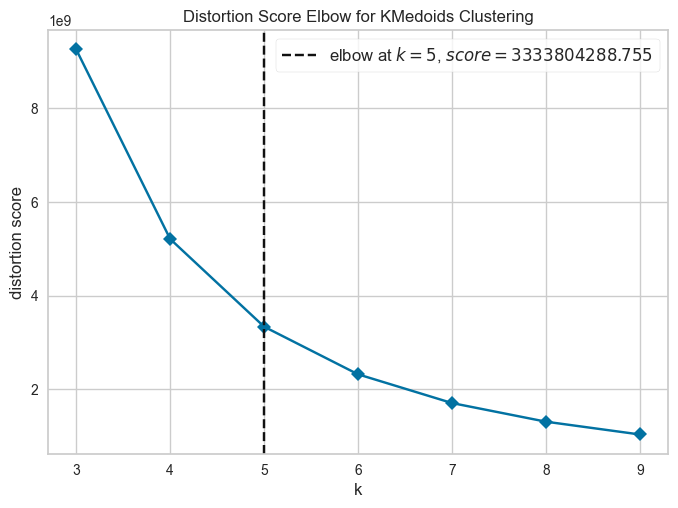

   cluster  count  percentage     Model
0        0   1998         0.2  Kmedoids
1        1   1999         0.2  Kmedoids
2        2   2011         0.2  Kmedoids
3        3   1995         0.2  Kmedoids
4        4   1997         0.2  Kmedoids
      Model  Silhouette  Davies Bouldin  n_clusters
0  Kmedoids    0.560674        0.500125           5
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         2996.5  42.433934  0.633133   99504.364102           2.713714   
1         6990.0  43.110555  0.607804  100971.075419           2.669335   
2         8995.0  41.585778  0.614620  101238.167046           2.776231   
3         4993.0  42.728321  0.612030   99333.642943           2.686717   
4          999.0  42.648473  0.609915   98909.412627           2.699049   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.173674                  1.173674            0.758442   
1            1.158579                  1.158579            0.76

In [20]:
kmedoids_cluster_labels = uv.kmedoids_w(minK=3, maxK=10, metric='distortion',
                                        rand_sample_prop=0.2,
                                        filename='kmedoidsModel.pkl', dataset=org_dataset)

#### 2.7. Minibatchkmeans clustering

Performing MiniBatchKmeans Clustering...


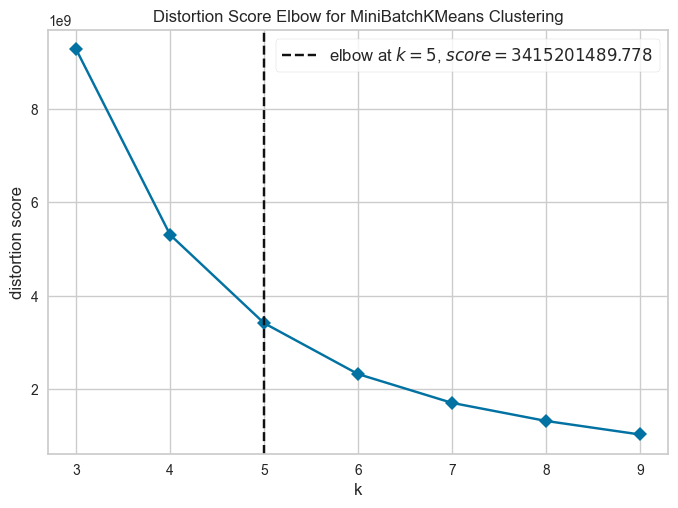

   cluster  count  percentage            Model
0        0   2147        0.21  MiniBatchKmeans
1        1   1803        0.18  MiniBatchKmeans
2        2   2309        0.23  MiniBatchKmeans
3        3   1806        0.18  MiniBatchKmeans
4        4   1935        0.19  MiniBatchKmeans
             Model  Silhouette  Davies Bouldin  n_clusters
0  MiniBatchKmeans      0.5596        0.500124           5
   individual_id    age_nbr   marital         income  aetna_family_size  \
0         3383.0  42.669306  0.640894   99864.476786           2.698184   
1         7293.0  42.835829  0.612313  102469.476401           2.716029   
2         1155.0  42.646167  0.605890   98402.955134           2.697705   
3         9097.5  41.589701  0.614618  100419.365848           2.771872   
4         5424.0  42.675452  0.602584   99329.849292           2.669767   

   aetna_num_children  aetna_num_children_modif  active_medical_ind  \
0            1.151374                  1.151374            0.766391   
1      

In [21]:
mini_batch_kmeans_cluster_labels = uv.minibatchkmeans_w(minK=3, maxK=10, metric='distortion',
                                                        rand_sample_prop=0.2,
                                                        filename='minibatchkmeansModel.pkl', dataset=org_dataset)

### 3. Model Selection

#### 3.1. Model Selection and Model Summary

Score table of all the models

In [22]:
recommended_model = uv.get_models_summary()

             Model  Silhouette  Davies Bouldin  n_clusters  Rank
2              GMM    0.590033        0.500047           3   1.0
0           KMeans    0.571686        0.500076           4   2.0
1     Hierarchical    0.544198        0.500049           3   3.0
3            Birch    0.536118        0.500058           3   4.0
4         Kmedoids    0.560674        0.500125           5   4.0
5  MiniBatchKmeans    0.559600        0.500124           5   4.0
Recommended Model:  GMM


### 4. Postprocessing

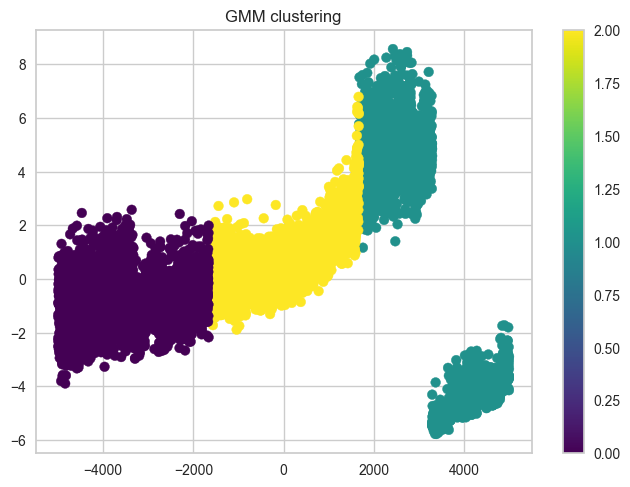

Cluster 1 classification counts:

 0    6672
1    3328
Name: Binary Cluster 1, dtype: int64
Cluster 2 classification counts:

 0    6667
1    3333
Name: Binary Cluster 2, dtype: int64
Cluster 0 classification counts:

 0    6661
1    3339
Name: Binary Cluster 0, dtype: int64
Differential Factors: 
age_nbr
income
first_pulse
pulse
max_pulse


In [23]:
pc, diff_factors_dataframe = uv.post_process(recommended_model=recommended_model, org_dataset=org_dataset,
                                             dependent_variable=dependent_variable,
                                             preprocessed_dataset=preprocessed_dataset, filename=parallel_plot_filename,
                                             kmeans_cluster_labels=kmeans_cluster_labels,
                                             hierarchical_cluster_labels=hierarchical_cluster_labels,
                                             gmm_cluster_labels=gmm_cluster_labels,
                                             birch_cluster_labels=birch_cluster_labels,
                                             kmedoids_cluster_labels=kmedoids_cluster_labels,
                                             mini_batch_kmeans_cluster_labels=mini_batch_kmeans_cluster_labels,
                                             n_variables=5)

### 5. Playbook

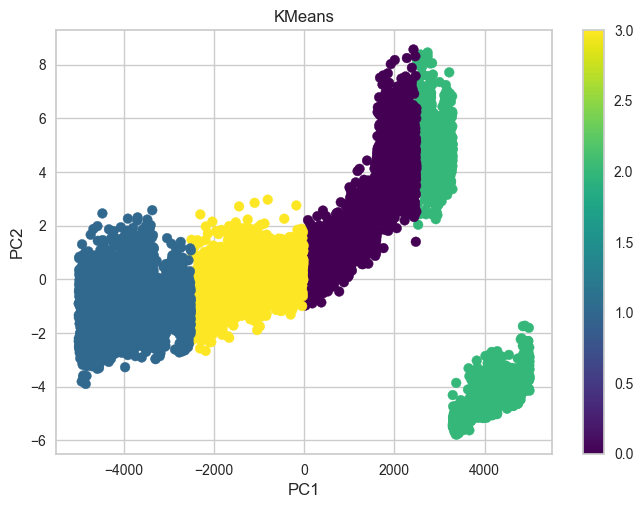

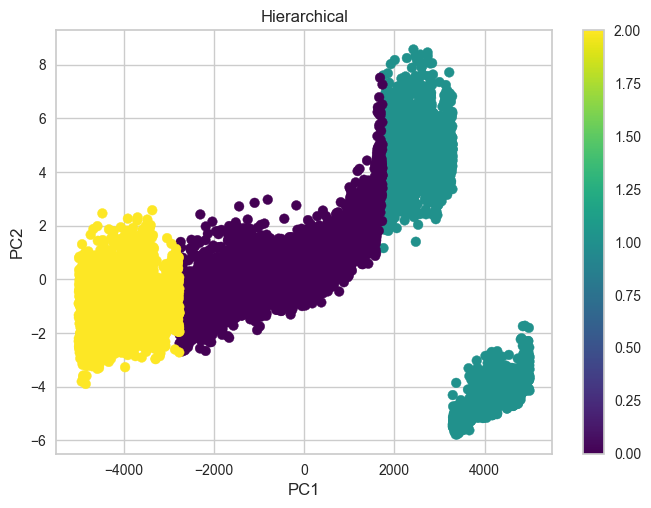

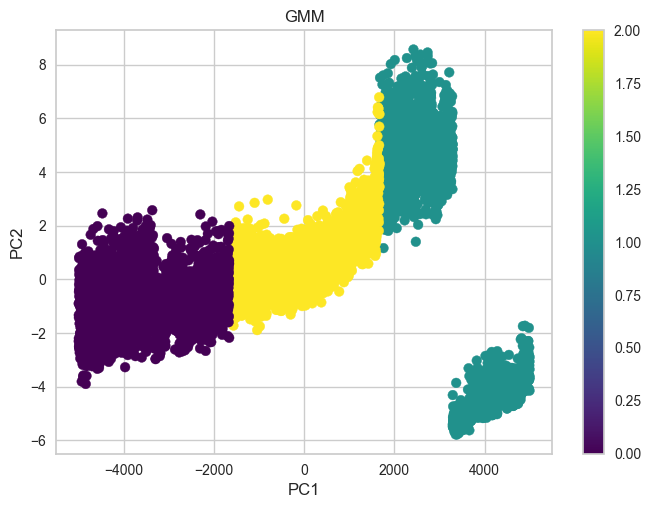

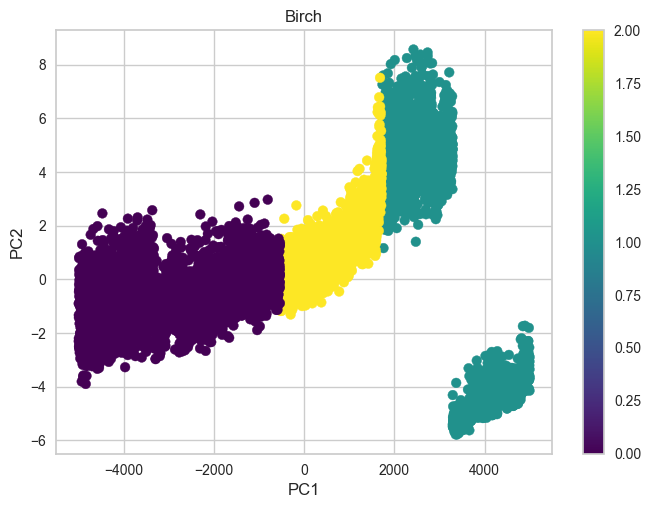

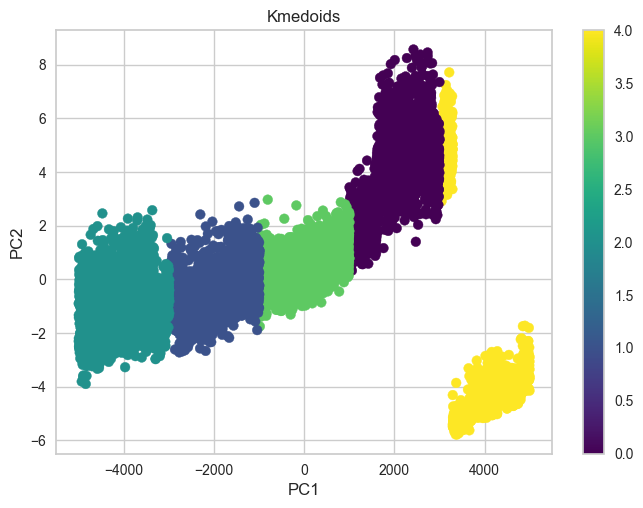

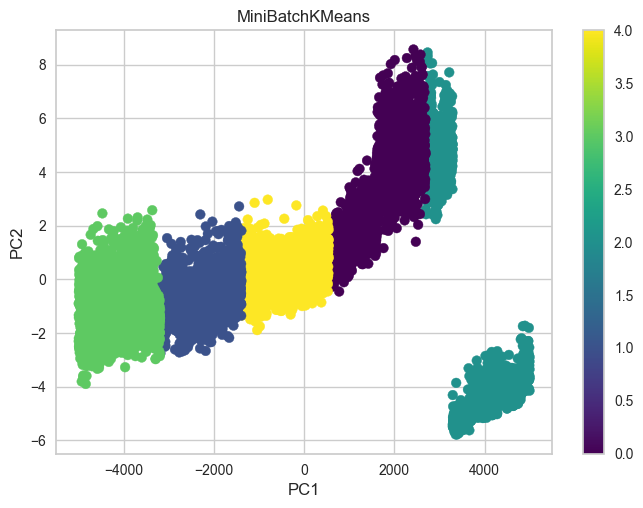

In [24]:
uv.playbook(filename='playbook.xlsx', org_dataset=org_dataset, dependent_variable=dependent_variable,
            im=parallel_plot_filename, diff_factors_dataframe=diff_factors_dataframe,
            pca=pc, kmeans_cluster_labels=kmeans_cluster_labels,
            hierarchical_cluster_labels=hierarchical_cluster_labels, gmm_cluster_labels=gmm_cluster_labels,
            birch_cluster_labels=birch_cluster_labels, kmedoids_cluster_labels=kmedoids_cluster_labels,
            mini_batch_kmeans_cluster_labels=mini_batch_kmeans_cluster_labels, to_delete=False)